In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
data["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
data.drop("User ID",axis=1,inplace=True)

In [7]:
data.duplicated().sum()

20

In [8]:
data_no_duplicates = data.drop_duplicates()
print(data_no_duplicates)

     Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[380 rows x 4 columns]


In [9]:
data_no_duplicates.duplicated().sum()

0

In [10]:
data_no_duplicates.isna()

,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
395,False,False,False,False
396,False,False,False,False
397,False,False,False,False
398,False,False,False,False


In [11]:
data_no_duplicates.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# create label encoding
label_encoder= LabelEncoder()
data_no_duplicates['Gender']=label_encoder.fit_transform(data_no_duplicates['Gender'])
data_no_duplicates

<ipython-input-12-b718d427eba7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates['Gender']=label_encoder.fit_transform(data_no_duplicates['Gender'])


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [13]:
y=data_no_duplicates["Purchased"]
x=data_no_duplicates.drop("Purchased",axis=1)

Spliting

In [16]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304, 3), (76, 3), (304,), (76,))

Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred=rf_clf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [21]:
print("Accuracy " ,accuracy_score(y_test,y_pred))

Accuracy  0.868421052631579


In [22]:
print("confusion matrix " ,confusion_matrix(y_test,y_pred))

confusion matrix  [[39  9]
 [ 1 27]]


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

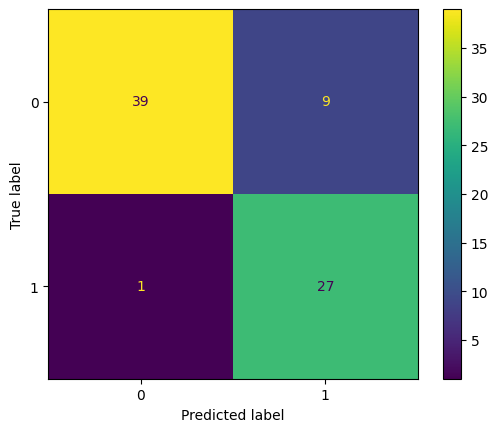

In [25]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [26]:
rf_clf1=RandomForestClassifier(n_estimators=50,criterion="entropy",max_depth=20)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50)

In [27]:
y_pred1=rf_clf1.predict(x_test)

In [28]:
print("Accuracy " ,accuracy_score(y_test,y_pred1))

Accuracy  0.868421052631579


In [29]:
print("confusion matrix " ,confusion_matrix(y_test,y_pred1))

confusion matrix  [[40  8]
 [ 2 26]]


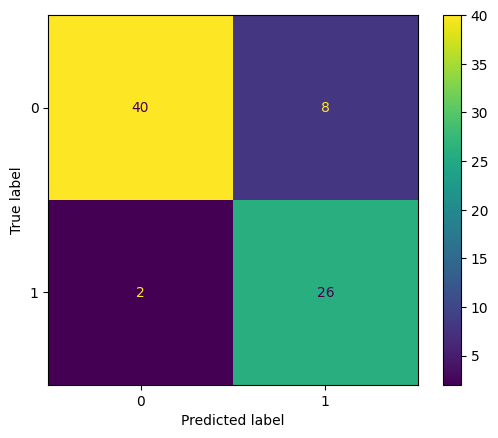

In [30]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [31]:
rf_clf2=RandomForestClassifier(n_estimators=150,criterion="entropy",max_depth=20,random_state=42) #hyper parameters
rf_clf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150,
                       random_state=42)

In [32]:
y_pred2=rf_clf2.predict(x_test)

In [33]:
print("Accuracy " ,accuracy_score(y_test,y_pred2))

Accuracy  0.8947368421052632
